In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

lm_path = f"./language_modeling.csv"
mcp_path = f"./multiple_choice_prompt.csv"
poe_path = f"./process_of_elimination.csv"
lm_df = pd.read_csv(lm_path)
mcp_df = pd.read_csv(mcp_path)
poe_df = pd.read_csv(poe_path)


In [9]:
def process(df):
    # get rid of identical rows 
    df = df.drop_duplicates() # is this really necessary?
    # df = df[df["checkpoint"].str.startswith("google/flan-t5")]
    # remove the seed column and batch_size column
    df = df.drop(columns=["model_family", "seed", "batch_size", "loading_precision", "sample"])
    # shorten checkpoint names
    df['checkpoint'] = df["checkpoint"].apply(lambda x: x.split("/")[-1])
    return df
    

In [10]:
lm_df = process(lm_df)
mcp_df = process(mcp_df)
poe_df = process(poe_df)
# concatenate the three dataframes
df = pd.concat([lm_df, mcp_df, poe_df])

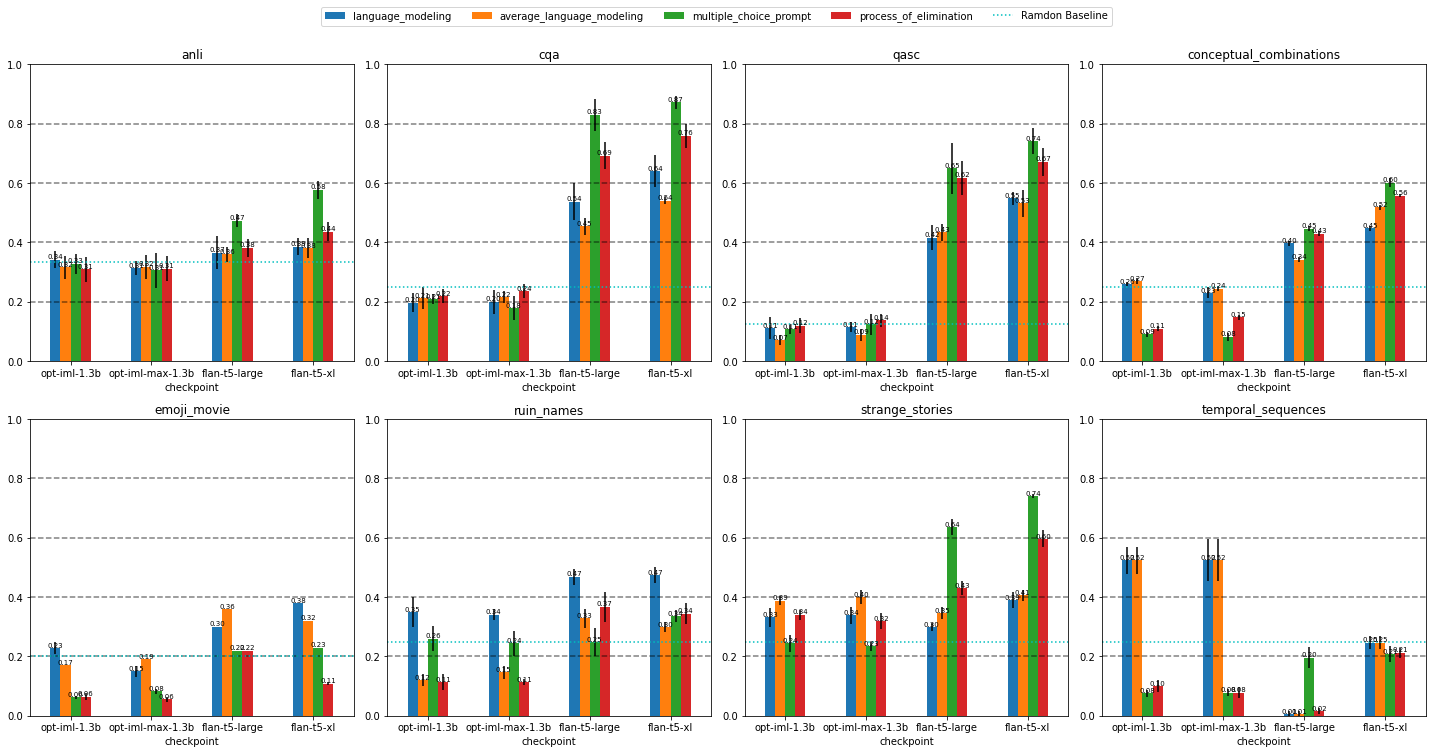

In [11]:
datasets = "anli cqa qasc conceptual_combinations emoji_movie ruin_names strange_stories temporal_sequences".split()
model_index = ["opt-iml-1.3b", "opt-iml-max-1.3b", "flan-t5-large", "flan-t5-xl"]
method_index = [('accuracy', 'language_modeling'), ('accuracy', 'average_language_modeling'), ('accuracy',    'multiple_choice_prompt'), ('accuracy',    'process_of_elimination')]
random_baselines = [1/3, 1/4, 1/8, 1/4, 1/5, 1/4, 1/4, 1/4]
# create subplots for eight datasets
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, dataset in enumerate(datasets):
    ax = axes[i//4][i%4]
    ax.set_ylim([0.0, 1.0])
    h_lines = [0.2, 0.4, 0.6, 0.8]
    data_df = df[(df["dataset"] == dataset) & (df["checkpoint"].isin(model_index))]
    data_df = data_df.groupby(["checkpoint","method"])
    data_means = data_df.mean().unstack().reindex(method_index, axis="columns").reindex(model_index, axis="rows")
    data_errors = data_df.std().unstack().reindex(method_index, axis="columns").reindex(model_index, axis="rows")
    data_means.plot.bar(yerr=data_errors, rot=0, ax=ax, title=dataset, legend=False)
    
    # add accuracy scores to each bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), ha='center', va='bottom', fontsize=7)
    for y in h_lines:
        ax.axhline(y, color="black", linestyle="--", alpha=0.5)
    # plot the random baseline
    ax.axhline(random_baselines[i], color="c", linestyle=":", alpha=1)

# get legends
handles, labels = axes[0][0].get_legend_handles_labels()
labels = [label[label.index(',')+2 : label.index(')')] for label in labels] 
handles += [mlines.Line2D([], [], linestyle=':', color='c', label='Custom Line')]
labels +=["Ramdon Baseline"]
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()

# save the figure
plt.savefig("v1.png", dpi=300, bbox_inches='tight')


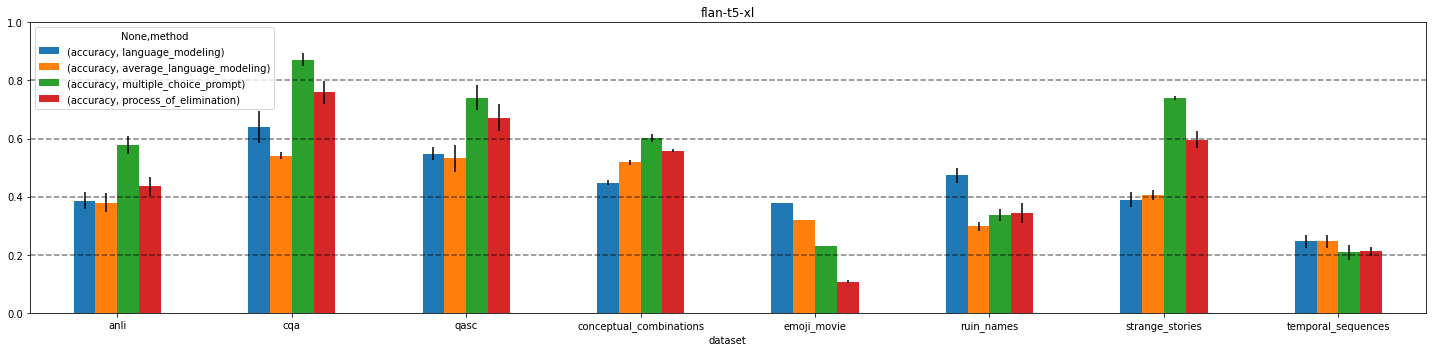

In [20]:
# plot flan-t5-xl on all benchmarks.
model = "flan-t5-xl"
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_ylim([0.0, 1.0])
h_lines = [0.2, 0.4, 0.6, 0.8]

sing_df = df[(df["dataset"].isin(datasets)) & (df["checkpoint"] == model)]
sing_df = sing_df.groupby(["dataset","method"])
sing_means = sing_df.mean().unstack().reindex(method_index, axis="columns").reindex(datasets, axis="rows")
sing_errors = sing_df.std().unstack().reindex(method_index, axis="columns").reindex(datasets, axis="rows")
sing_means.plot.bar(yerr=sing_errors, rot=0, figsize=(20, 5), title=model, legend=True, ax=ax)
for line in h_lines:
    ax.axhline(line, color="black", linestyle="--", alpha=0.5)

plt.tight_layout()
# plt.savefig("v2.png", dpi=300, bbox_inches='tight')

In [139]:
handles[0]

<BarContainer object of 4 artists>

<AxesSubplot:xlabel='checkpoint'>

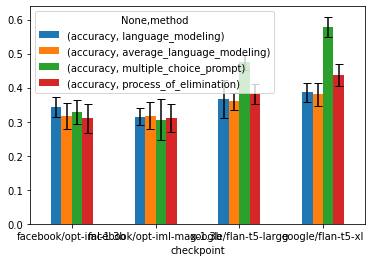

In [64]:
models = ["facebook/opt-iml-1.3b", "facebook/opt-iml-max-1.3b", "google/flan-t5-large", "google/flan-t5-xl"]
method_index = [('accuracy', 'language_modeling'), ('accuracy', 'average_language_modeling'), ('accuracy',    'multiple_choice_prompt'), ('accuracy',    'process_of_elimination')]
anli_df = df[(df["dataset"] == "anli") & (df["checkpoint"].isin(models))]

anli_df = anli_df.groupby(["checkpoint","method"])
anli_means = anli_df.mean().unstack().reindex(method_index, axis="columns")
anli_errors = anli_df.std().unstack().reindex(method_index, axis="columns")

fig, ax = plt.subplots()

anli_means.plot.bar(yerr=anli_errors, ax=ax, capsize=4, rot=0)
# plot horizontal lines corresponding to y labels
# for y in [0.4, 0.5]:
#     ax.axhline(y, color="black", linestyle="--", alpha=0.5)


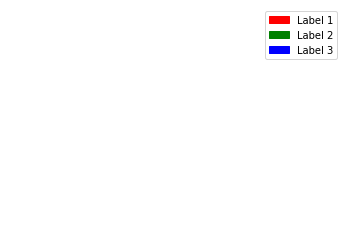

In [140]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create custom legend handles and labels
handles = [
    mpatches.Patch(color='red', label='Red'),
    mpatches.Patch(color='green', label='Green'),
    mpatches.Patch(color='blue', label='Blue')
]
labels = ['Label 1', 'Label 2', 'Label 3']

# Create the legend
plt.legend(handles=handles, labels=labels)

# Hide the axis labels
plt.axis('off')

# Show the plot
plt.show()
